In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import r2_score,accuracy_score,confusion_matrix,f1_score,classification_report
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
data = pd.read_csv('application_train.csv')
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
data.shape

(307511, 122)

In [4]:
data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [6]:
data.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [7]:
data.dropna(inplace = True)

In [8]:
data.isnull().sum()

SK_ID_CURR                    0
TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
                             ..
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Length: 122, dtype: int64

array([[<AxesSubplot:title={'center':'SK_ID_CURR'}>,
        <AxesSubplot:title={'center':'TARGET'}>,
        <AxesSubplot:title={'center':'CNT_CHILDREN'}>,
        <AxesSubplot:title={'center':'AMT_INCOME_TOTAL'}>,
        <AxesSubplot:title={'center':'AMT_CREDIT'}>,
        <AxesSubplot:title={'center':'AMT_ANNUITY'}>,
        <AxesSubplot:title={'center':'AMT_GOODS_PRICE'}>,
        <AxesSubplot:title={'center':'REGION_POPULATION_RELATIVE'}>,
        <AxesSubplot:title={'center':'DAYS_BIRTH'}>,
        <AxesSubplot:title={'center':'DAYS_EMPLOYED'}>],
       [<AxesSubplot:title={'center':'DAYS_REGISTRATION'}>,
        <AxesSubplot:title={'center':'DAYS_ID_PUBLISH'}>,
        <AxesSubplot:title={'center':'OWN_CAR_AGE'}>,
        <AxesSubplot:title={'center':'FLAG_MOBIL'}>,
        <AxesSubplot:title={'center':'FLAG_EMP_PHONE'}>,
        <AxesSubplot:title={'center':'FLAG_WORK_PHONE'}>,
        <AxesSubplot:title={'center':'FLAG_CONT_MOBILE'}>,
        <AxesSubplot:title={'center':'FLA

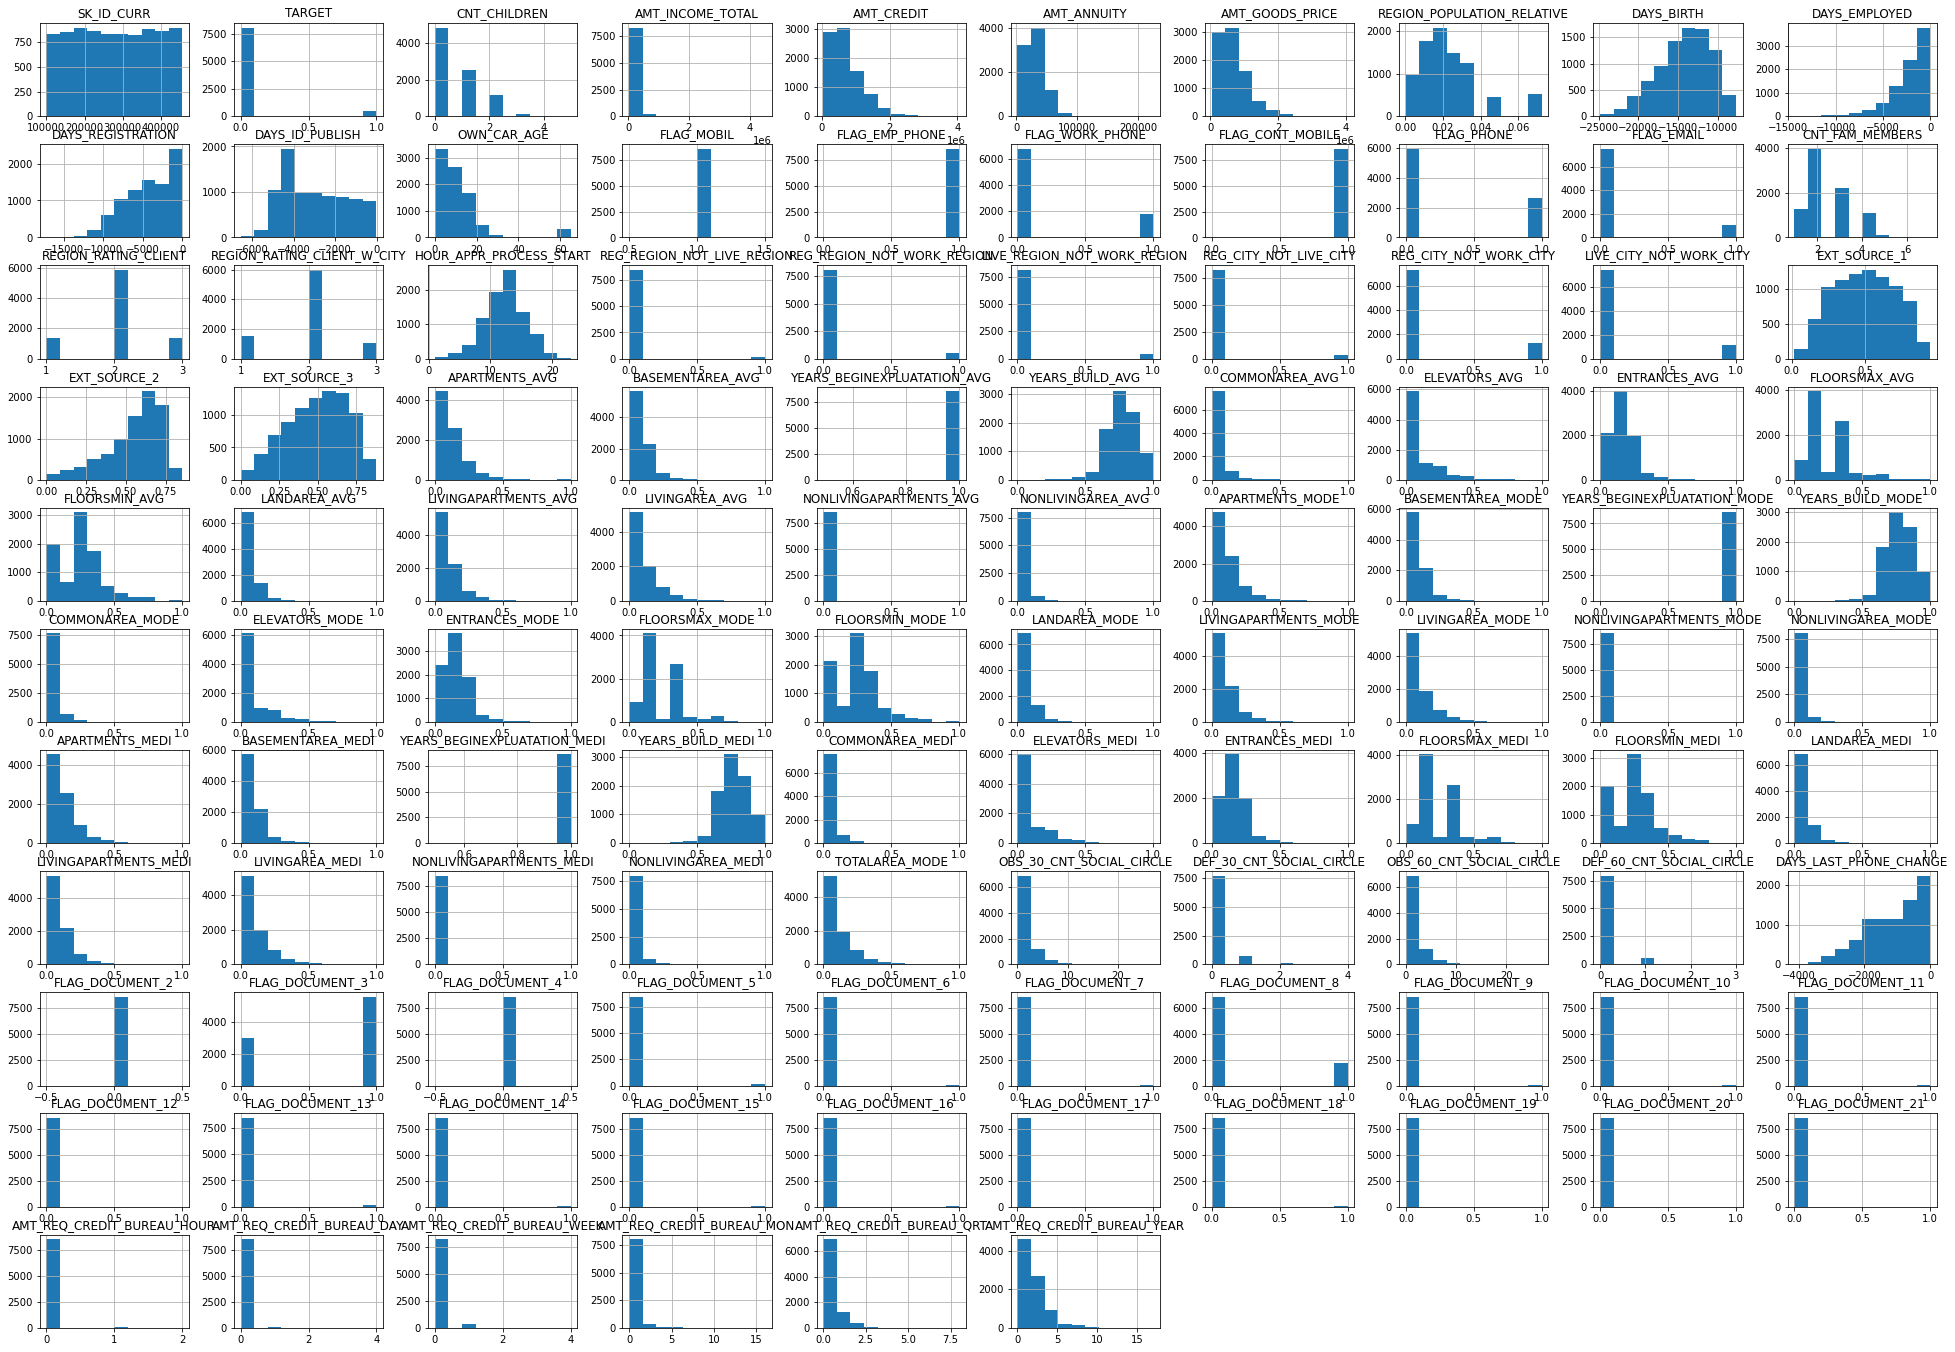

In [9]:
data.hist(figsize=(34,24))

In [10]:
# checking correlation of day data
corr = data.corr()
corr['TARGET'].sort_values(ascending = False)

TARGET                         1.000000
DAYS_EMPLOYED                  0.062950
REGION_RATING_CLIENT_W_CITY    0.061214
FLAG_DOCUMENT_3                0.054269
REGION_RATING_CLIENT           0.053614
                                 ...   
EXT_SOURCE_2                  -0.130969
EXT_SOURCE_3                  -0.150720
FLAG_MOBIL                          NaN
FLAG_DOCUMENT_2                     NaN
FLAG_DOCUMENT_4                     NaN
Name: TARGET, Length: 106, dtype: float64

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for x in data:
    if data[x].dtypes=='object':
        data[x] = le.fit_transform(data[x])

In [12]:
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
71,100083,0,0,1,0,1,0,103500.0,573628.5,24435.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
124,100145,0,0,0,0,1,1,202500.0,260725.5,16789.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
152,100179,0,0,0,0,0,0,202500.0,675000.0,53329.5,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,4.0
161,100190,0,0,1,0,0,0,162000.0,263686.5,24781.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
255,100295,1,0,1,0,0,1,225000.0,1019205.0,31032.0,...,1,0,0,0,0.0,0.0,0.0,6.0,0.0,1.0


In [13]:
x = data.drop(columns=['SK_ID_CURR'],axis=1)
y =data['TARGET']

In [14]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [15]:
x_train.shape

(6881, 121)

In [16]:
x_test.shape

(1721, 121)

In [17]:
# Linear regression
model = LinearRegression()
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
r2_score(y_test,y_predict)

1.0

In [18]:
y_test

156249    0
221795    0
23043     0
72297     0
28090     0
         ..
304835    1
149932    0
232745    0
215981    0
177889    0
Name: TARGET, Length: 1721, dtype: int64

In [19]:
y_predict

array([ 9.51889839e-14, -3.04012359e-13,  3.41418435e-13, ...,
        4.69271048e-14,  2.08240441e-13,  1.54176627e-12])

In [20]:
pd.crosstab(y_test,y_predict)

col_0,-4.336178e-12,-3.743576e-12,-3.319857e-12,-3.088874e-12,-2.617495e-12,-2.372750e-12,-2.285359e-12,-2.266746e-12,-2.225428e-12,-2.167050e-12,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
TARGET,,,,,,,,,,,,,,,,,,,,,
0,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1


In [21]:
 # Logistic regression
model = LogisticRegression()
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
accuracy_score(y_test,y_predict)

0.9488669378268448

In [22]:
y_test

156249    0
221795    0
23043     0
72297     0
28090     0
         ..
304835    1
149932    0
232745    0
215981    0
177889    0
Name: TARGET, Length: 1721, dtype: int64

In [23]:
y_predict

array([0, 0, 0, ..., 0, 0, 0])

In [24]:
pd.crosstab(y_test,y_predict)

col_0,0
TARGET,
0,1633
1,88


In [25]:

confusion_matrix(y_test,y_predict)

array([[1633,    0],
       [  88,    0]])

In [26]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1633
           1       0.00      0.00      0.00        88

    accuracy                           0.95      1721
   macro avg       0.47      0.50      0.49      1721
weighted avg       0.90      0.95      0.92      1721



In [27]:
# decision tree model
model = DecisionTreeClassifier()
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
accuracy_score(y_test,y_predict)

1.0

In [28]:
pd.crosstab(y_test,y_predict)

col_0,0,1
TARGET,,
0,1633,0
1,0,88


In [29]:
confusion_matrix(y_test,y_predict)

array([[1633,    0],
       [   0,   88]])

In [30]:
print(classification_report(y_test,y_predict))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1633
           1       1.00      1.00      1.00        88

    accuracy                           1.00      1721
   macro avg       1.00      1.00      1.00      1721
weighted avg       1.00      1.00      1.00      1721



In [31]:
# random forest classifier model
model = RandomForestClassifier(random_state=10,n_estimators=100)
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
accuracy_score(y_test,y_predict)

1.0

In [32]:
pd.crosstab(y_test,y_predict)

col_0,0,1
TARGET,,
0,1633,0
1,0,88


In [33]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1633
           1       1.00      1.00      1.00        88

    accuracy                           1.00      1721
   macro avg       1.00      1.00      1.00      1721
weighted avg       1.00      1.00      1.00      1721



In [34]:
# ExtraTreeClassifier
model = ExtraTreesClassifier()
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
accuracy_score(y_test,y_predict)

1.0

In [35]:
pd.crosstab(y_test,y_predict)

col_0,0,1
TARGET,,
0,1633,0
1,0,88


In [36]:

print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1633
           1       1.00      1.00      1.00        88

    accuracy                           1.00      1721
   macro avg       1.00      1.00      1.00      1721
weighted avg       1.00      1.00      1.00      1721



In [37]:

# MPL Classifier
model = MLPClassifier()
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
accuracy_score(y_test,y_predict)

0.08367228355607205

In [38]:
pd.crosstab(y_test,y_predict)

col_0,0,1
TARGET,,
0,60,1573
1,4,84


In [39]:
print(classification_report(y_test,y_predict))


              precision    recall  f1-score   support

           0       0.94      0.04      0.07      1633
           1       0.05      0.95      0.10        88

    accuracy                           0.08      1721
   macro avg       0.49      0.50      0.08      1721
weighted avg       0.89      0.08      0.07      1721



In [40]:
# KNN
model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
accuracy_score(y_test,y_predict)

0.9442184776292853

In [41]:
pd.crosstab(y_test,y_predict)

col_0,0,1
TARGET,,
0,1625,8
1,88,0


In [42]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1633
           1       0.00      0.00      0.00        88

    accuracy                           0.94      1721
   macro avg       0.47      0.50      0.49      1721
weighted avg       0.90      0.94      0.92      1721



In [43]:
y_predict = model.predict(x_test)

In [44]:
matrix=confusion_matrix(y_test,y_predict)
print(matrix)

[[1625    8]
 [  88    0]]


<AxesSubplot:>

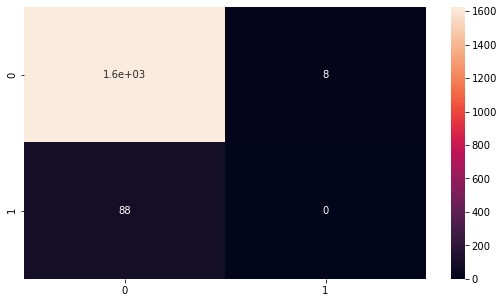

In [45]:

plt.figure(figsize = (9,5))
sns.heatmap(matrix,annot=True)

In [46]:
print("accuracy:",accuracy_score(y_test,y_predict))

accuracy: 0.9442184776292853


In [47]:
#Dataframe for models
models = {"Logistic Regression": LogisticRegression(),
          "Linear Regression": LinearRegression(),
          "Random Forest": RandomForestClassifier(),
          "DecisionTree": DecisionTreeClassifier(),
          "KNN": KNeighborsClassifier(),
          "ETC": ExtraTreesClassifier(),
          "MPL": MLPClassifier()}
          
          

# Create a function to fit and score models
def fit_and_score(models, x_train, x_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(x_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(x_test, y_test)
    return model_scores


In [48]:
model_scores = fit_and_score(models=models,
                             x_train=x_train,
                             x_test=x_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

{'Logistic Regression': 0.9488669378268448,
 'Linear Regression': 1.0,
 'Random Forest': 0.999418942475305,
 'DecisionTree': 1.0,
 'KNN': 0.9442184776292853,
 'ETC': 1.0,
 'MPL': 0.9482858803021499}

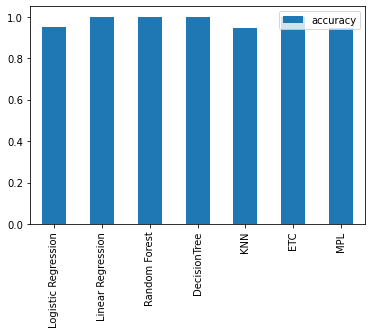

In [49]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();
